# IT41 Project 2 - Quantum World

In [ ]:
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.tools.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')

### 3 Qubits

In [ ]:
def deutsch_jozsa(function_to_test):
    qr1 = QuantumRegister(3, '|0⟩')
    qr2 = QuantumRegister(1, 'second reg.')
    cr = ClassicalRegister(3, 'classic. reg.')
    circuit = QuantumCircuit(qr1, qr2, cr)

    circuit.barrier(qr1)
    circuit.h(qr1)
    circuit.x(qr2)
    circuit.h(qr2)
    circuit.barrier(qr1, qr2)

    circuit = circuit.compose(function_to_test, qubits=[0, 1, 2, 3])  # We add the function to test

    circuit.barrier(qr1, qr2)
    circuit.h(qr1)
    circuit.barrier(qr1, qr2)
    circuit.measure(qr1, cr)

    result = execute(circuit, backend=simulator, shots=1000).result()
    counts = result.get_counts()
    counts = {k[::-1]: v for k, v in counts.items()}  # We reverse the binary strings to match the order of the qubits

    print(counts)
    return circuit.draw('mpl')

### N Qubits

In [ ]:
def deutsch_jozsa_extended(function_to_test):
    n = function_to_test.num_qubits - 1
    print(n)
    qr1 = QuantumRegister(n, '|0⟩')
    qr2 = QuantumRegister(1, 'second reg.')
    cr = ClassicalRegister(n, 'classic. reg.')
    circuit = QuantumCircuit(qr1, qr2, cr)

    circuit.barrier(qr1)
    circuit.h(qr1)
    circuit.x(qr2)
    circuit.h(qr2)
    circuit.barrier(qr1, qr2)

    circuit = circuit.compose(function_to_test, qubits=[*range(n), n])  # We add the function to test

    circuit.barrier(qr1, qr2)
    circuit.h(qr1)
    circuit.barrier(qr1, qr2)
    circuit.measure(qr1, cr)

    result = execute(circuit, backend=simulator, shots=999).result()
    counts = result.get_counts()
    counts = {k[::-1]: v for k, v in counts.items()}

    print(counts)
    return circuit.draw('mpl')


### Balanced Functions

4
{'0100': 999}


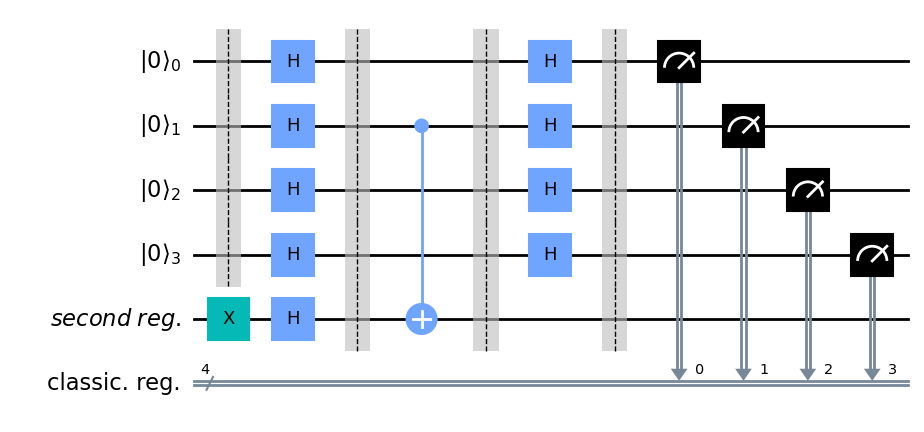

In [61]:
def function_balanced1(n):
    qr = QuantumRegister(n+1)
    circuit = QuantumCircuit(qr)

    ### Write the function to be tested here: ###
    circuit.cx(qr[1], qr[n])

    #############################################

    return circuit

deutsch_jozsa_extended(function_balanced1(4))

8
{'10000000': 999}


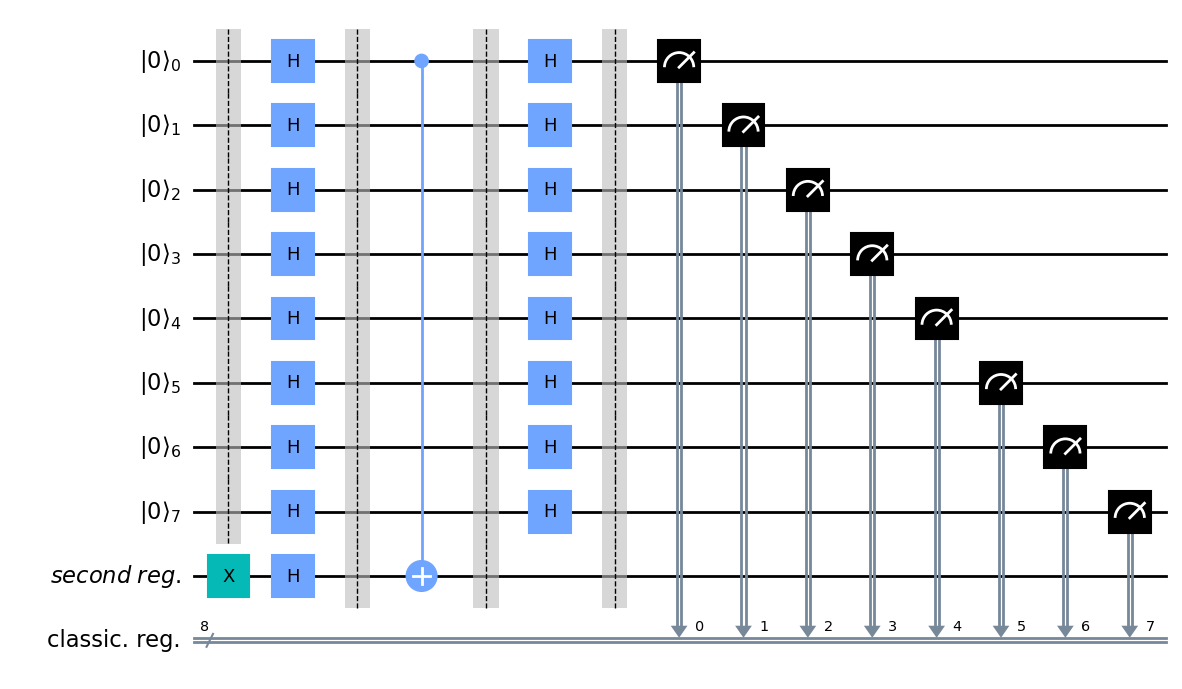

In [62]:
def function_balanced2(n):
    qr = QuantumRegister(n+1)
    circuit = QuantumCircuit(qr)

    ### Write the function to be tested here: ###
    circuit.cx(qr[0], qr[n])
    #############################################

    return circuit

deutsch_jozsa_extended(function_balanced2(8))

### Constant Functions

4
{'0000': 999}


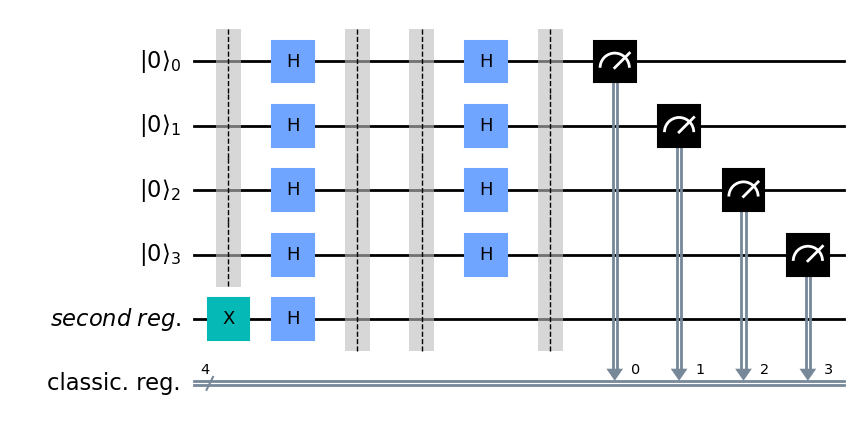

In [63]:
def function_constant1(n):
    qr = QuantumRegister(n+1)
    circuit = QuantumCircuit(qr)

    ### Write the function to be tested here: ###

    #############################################

    return circuit

deutsch_jozsa_extended(function_constant1(4))

6
{'000000': 999}


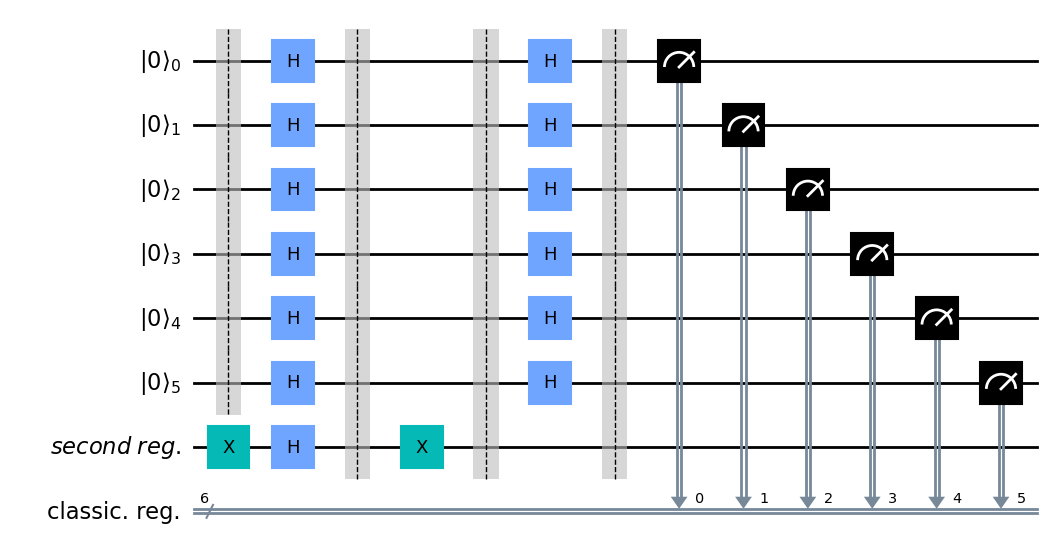

In [64]:
def function_constant2(n):
    qr = QuantumRegister(n+1)
    circuit = QuantumCircuit(qr)

    ### Write the function to be tested here: ###

    circuit.x(qr[n])
    #############################################

    return circuit

deutsch_jozsa_extended(function_constant2(6))